# 분산분석 개념과 원리 

## 개념

- 세 집단 이상간의 평균차이 분석

- 독립변수(3집단 이상), 종속변수(연속형 변수)

- 머신 러닝의 가장 큰 과제 중 하나는 모델을 학습하는 데 사용되는 가장 안정적이고 유용한 기능을 선택하는 것입니다. ANOVA는 모델 학습에 가장 적합한 기능을 선택하는 데 도움이 됩니다. ANOVA는 모델의 복잡성을 줄이기 위해 입력 변수의 수를 최소화합니다. ANOVA는 독립 변수가 목표 변수에 영향을 미치는지 확인하는 데 도움이 됩니다.



## 분산분석 대상 변수는 무엇일까?

- 결혼여부, 학력, 직업, 월소득, 피부타입 

- 인지 브랜드, 구매동기, 구매성향 

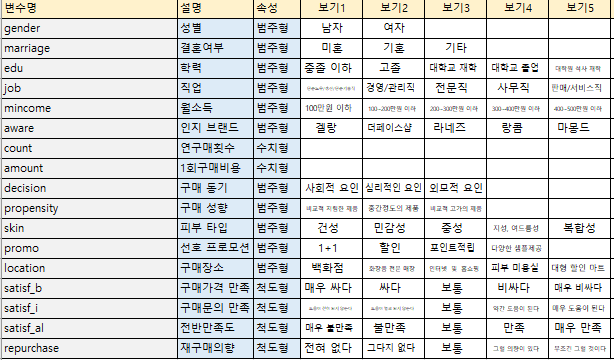

In [1]:
a <- read.csv('cosmetics.csv', header = T)

In [2]:
a

gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3
2,2,2,7,3,1,2,100000,2,1,4,2,3,3,4,4,3
2,1,6,4,5,1,5,100000,3,2,5,2,3,2,2,3,4
1,1,6,4,5,4,10,39000,3,2,2,1,2,4,4,4,4
2,2,4,5,2,2,2,40000,3,2,3,2,3,3,4,4,4
2,2,4,5,2,1,2,100000,3,3,3,1,3,2,3,4,4


In [3]:
library(psych)

In [4]:
attach(a)

> decision 확인 표


|변수명|설명 |속성 |보기1 |보기2|보기3
|------|---|---|------|---|---|
|decision|구매 동기 |범주형 |사회적 요인|심리적인 요인|외모적 요인

In [7]:
describeBy(satisf_al, group = decision) # 사회적 요인 = group: 1 , 심리적인 요인 = group: 2


 Descriptive statistics by group 
group: 1
   vars  n mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 42 3.24 0.98      3    3.35 1.48   1   5     4 -0.77     0.31 0.15
------------------------------------------------------------ 
group: 2
   vars  n mean  sd median trimmed  mad min max range  skew kurtosis   se
X1    1 67 3.34 0.9      3    3.45 1.48   1   5     4 -0.96      1.2 0.11
------------------------------------------------------------ 
group: 3
   vars   n mean   sd median trimmed mad min max range skew kurtosis   se
X1    1 138 3.59 0.55      4    3.57   0   3   5     2 0.18       -1 0.05

- 외모적인 요인으로 많이 구매한다는 것을 알 수 있다. 

In [12]:
result<-aov(satisf_al~factor(decision))

In [13]:
result

Call:
   aov(formula = satisf_al ~ factor(decision))

Terms:
                factor(decision) Residuals
Sum of Squares           5.20457 134.18005
Deg. of Freedom                2       244

Residual standard error: 0.7415647
Estimated effects may be unbalanced

In [14]:
summary(result)

                  Df Sum Sq Mean Sq F value  Pr(>F)   
factor(decision)   2    5.2  2.6023   4.732 0.00963 **
Residuals        244  134.2  0.5499                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- Tukey's HSD(honestly significant difference) test는 studentized range distribution을 이용하여 모든 가능한 두 수준들의 평균간의 차이가 있는지를 검정(pairwise post-hoc testing using Tukey HSD test)하는 방법입니다.



In [ ]:
- R에서 기본적으로 제공하는 사후 검증 기법은 Tukey HSD가 있다.


In [15]:
TukeyHSD(result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = satisf_al ~ factor(decision))

$`factor(decision)`
         diff         lwr       upr     p adj
2-1 0.1051883 -0.23897424 0.4493509 0.7514634
3-1 0.3488613  0.04069543 0.6570271 0.0220153
3-2 0.2436729 -0.01670994 0.5040558 0.0720246


- 2-1 : 2번째 집단과 1번째 집단과의 차이 (diff) 
- lwr : 하한값
- upr : 상한값

> Tukey multiple comparisons of means
    95% family-wise confidence level
> > Tukey's HSD test 결과를 보면, "multiple comparisons of means, 95% family-wise confidence level', 2개씩 쌍을 이룬 수준간 평균의 다중 비교를 95% 신뢰수준이라는 의미입니다.


* 위의 결과를 보면 'group 2'와 'group 1'은 평균 차이가 0.1051883 이고 P-value가 0.7514634로서 유의수준 0.05보다 크므로 귀무가설 '두 집단 간 평균차이는 없다'를 채택하게 됩니다.


In [21]:
install.packages("agricolae") 


  There is a binary version available but the source version is later:
          binary source needs_compilation
agricolae  1.3-3  1.3-5             FALSE



installing the source package 'agricolae'



In [22]:
library(agricolae)

In [25]:
scheffe.test(result,"factor(decision)", alpha = 0.05, console = T)


Study: result ~ "factor(decision)"

Scheffe Test for satisf_al 

Mean Square Error  : 0.5499182 

factor(decision),  means

  satisf_al       std   r Min Max
1  3.238095 0.9830149  42   1   5
2  3.343284 0.8970024  67   1   5
3  3.586957 0.5500930 138   3   5

Alpha: 0.05 ; DF Error: 244 
Critical Value of F: 3.032816 

Groups according to probability of means differences and alpha level( 0.05 )

Means with the same letter are not significantly different.

  satisf_al groups
3  3.586957      a
2  3.343284     ab
1  3.238095      b


In [26]:
duncan.test(result,"factor(decision)", alpha = 0.05, console = T)


Study: result ~ "factor(decision)"

Duncan's new multiple range test
for satisf_al 

Mean Square Error:  0.5499182 

factor(decision),  means

  satisf_al       std   r Min Max
1  3.238095 0.9830149  42   1   5
2  3.343284 0.8970024  67   1   5
3  3.586957 0.5500930 138   3   5

Groups according to probability of means differences and alpha level( 0.05 )

Means with the same letter are not significantly different.

  satisf_al groups
3  3.586957      a
2  3.343284     ab
1  3.238095      b


In [27]:
library(ggplot2)


Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



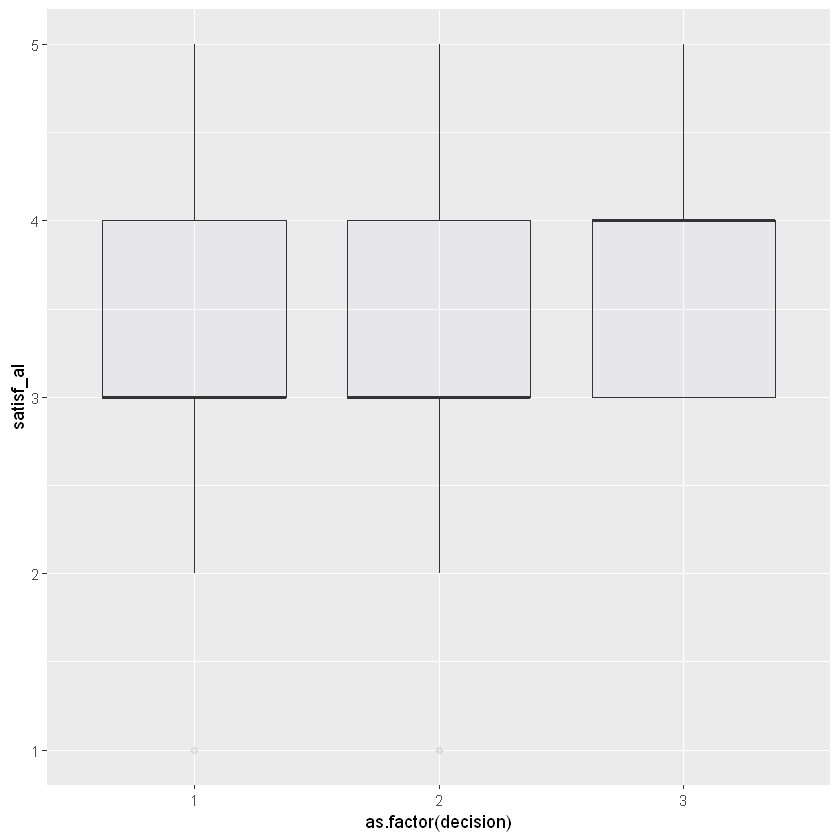

In [30]:
ggplot(a,aes(x=as.factor(decision), y=satisf_al)) + geom_boxplot(fill='blue', alpha=0.02)

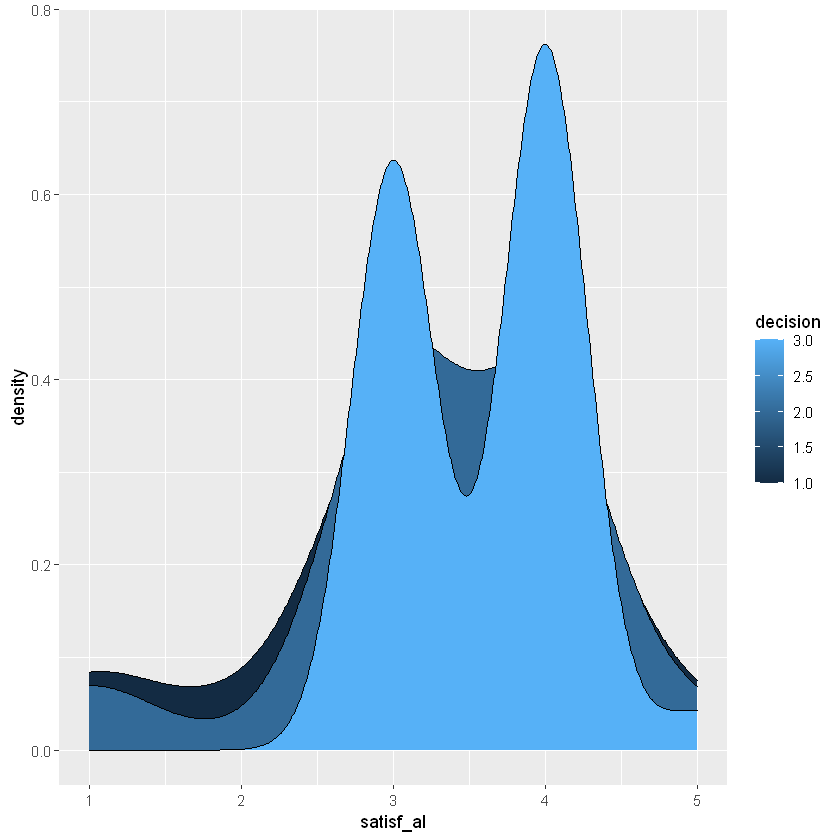

In [33]:
ggplot(data=a, aes(x=satisf_al, group=decision, fill=decision))+geom_density(adjust=1.5)